In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Downloading the data**

**2. Loading the data**

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [4]:
df = df.drop(df[df['sex'] == 'nan'].index)
df = df.drop(df[df['sex'] == '.'].index)

# 3. Visualising the data

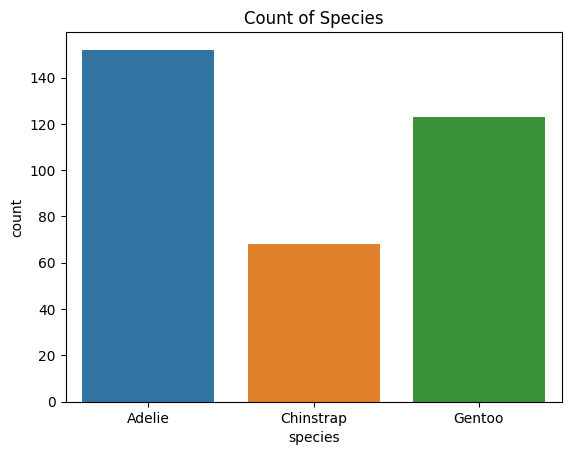

<Figure size 1500x800 with 0 Axes>

In [5]:
sns.countplot(data=df, x='species')
plt.title('Count of Species')
plt.figure(figsize=(15,8))
plt.show()

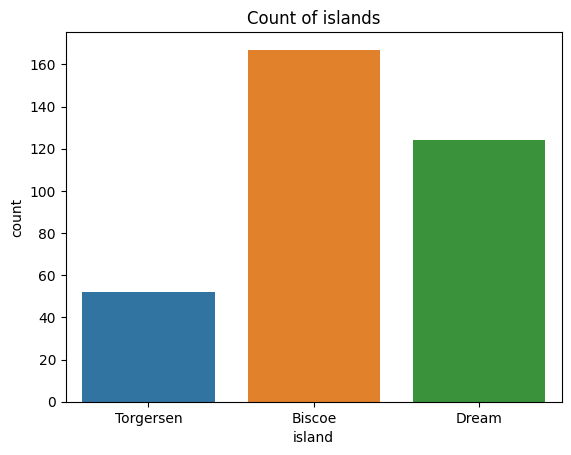

<Figure size 1500x800 with 0 Axes>

In [6]:
sns.countplot(data=df, x='island')
plt.title('Count of islands')
plt.figure(figsize=(15,8))
plt.show()

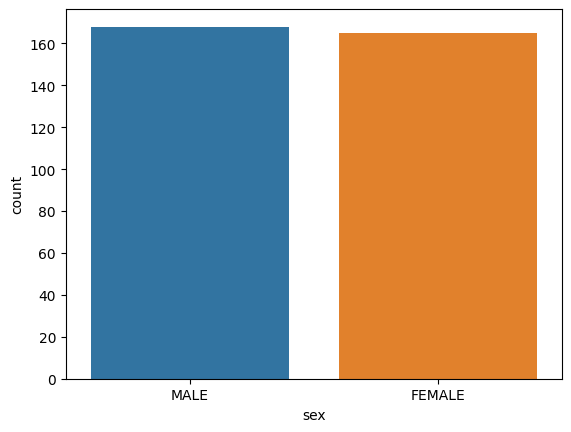

<Figure size 1500x800 with 0 Axes>

In [7]:
sns.countplot(data=df, x='sex')
plt.figure(figsize=(15,8))
plt.show()

<Axes: >

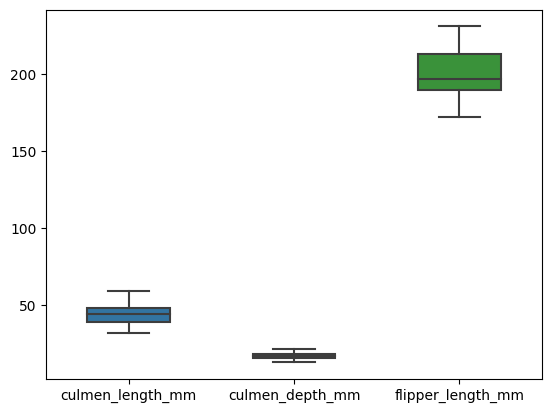

In [8]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

<Axes: >

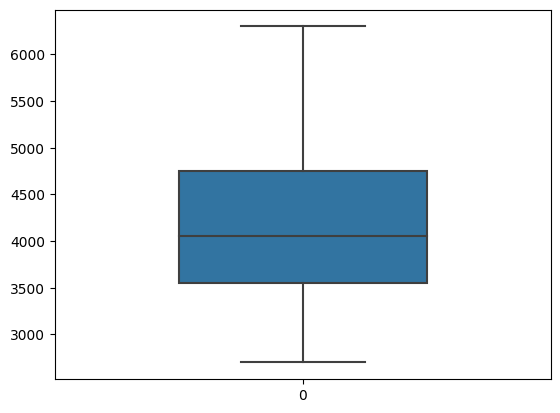

In [9]:
sns.boxplot(data=df["body_mass_g"], width=0.5,fliersize=5)

<Axes: xlabel='species', ylabel='Count'>

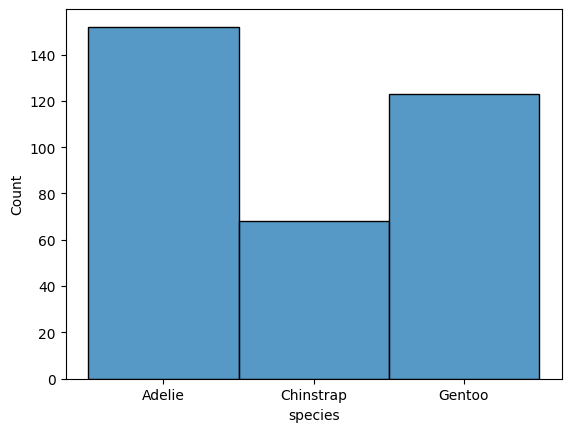

In [10]:
sns.histplot(data=df, x='species')

d:\ana\envs\meta\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\ana\envs\meta\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


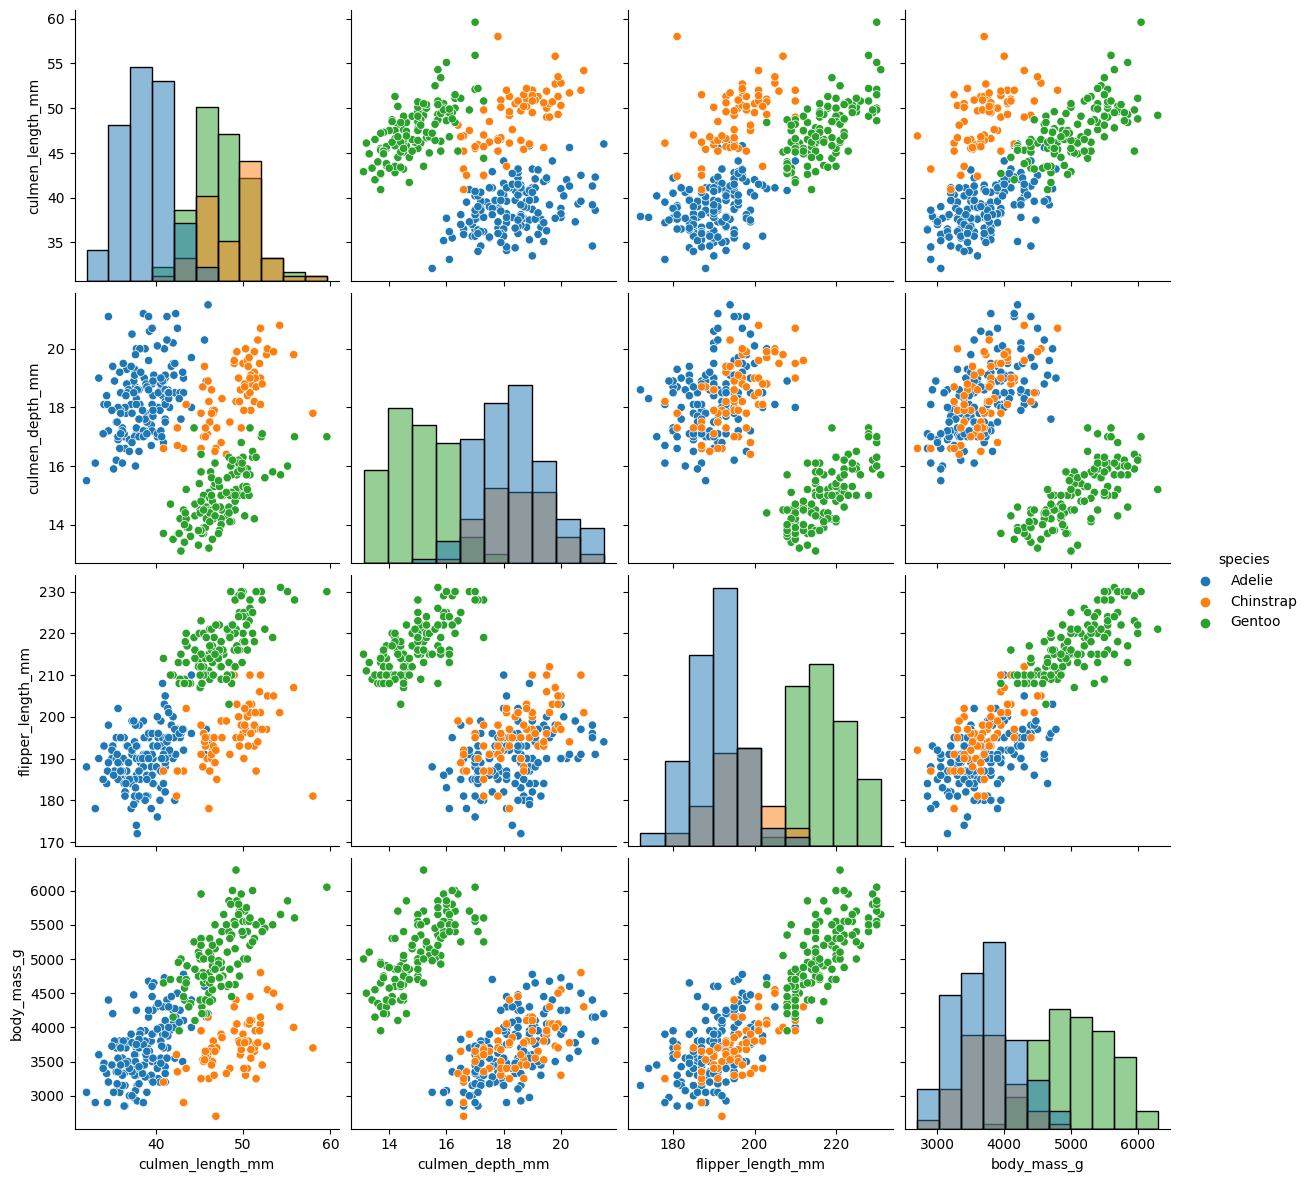

In [11]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

# 4. Descriptive statistics on the data

In [12]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,341.000000,341.000000,341.000000,341.000000
mean,43.920235,17.155425,200.868035,4199.780059
std,5.467516,1.976124,14.055255,802.300201
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.400000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# 5. Handling missing values

In [13]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [14]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [15]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# 6. Handling outliers

In [16]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
   return df

In [17]:
df['culmen_length_mm'] = impute_outliers_IQR(df['culmen_length_mm'])
df['culmen_depth_mm'] = impute_outliers_IQR(df['culmen_depth_mm'])
df['flipper_length_mm'] = impute_outliers_IQR(df['flipper_length_mm'])
df['body_mass_g'] = impute_outliers_IQR(df['body_mass_g'])

# 7. Correlation of independent variables with the target

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])

In [19]:
df[df.columns[1:]].corr()['sex'][:]

ValueError: could not convert string to float: 'Torgersen'

# 8. Encoding categorical columns

In [ ]:
df["species"] = lb.fit_transform(df["species"])
df["island"] = lb.fit_transform(df["island"])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.100000,18.700000,181.000000,3750.000000,1
1,0,2,39.500000,17.400000,186.000000,3800.000000,0
2,0,2,40.300000,18.000000,195.000000,3250.000000,0
3,0,2,43.920235,17.155425,200.868035,4199.780059,1
4,0,2,36.700000,19.300000,193.000000,3450.000000,0


# 9. Split the data into dependent and independent variables

In [ ]:
X = df.drop('sex', axis=1)
X

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,2,39.100000,18.700000,181.000000,3750.000000
1,0,2,39.500000,17.400000,186.000000,3800.000000
2,0,2,40.300000,18.000000,195.000000,3250.000000
3,0,2,43.920235,17.155425,200.868035,4199.780059
4,0,2,36.700000,19.300000,193.000000,3450.000000
...,...,...,...,...,...,...
339,2,0,43.920235,17.155425,200.868035,4199.780059
340,2,0,46.800000,14.300000,215.000000,4850.000000
341,2,0,50.400000,15.700000,222.000000,5750.000000
342,2,0,45.200000,14.800000,212.000000,5200.000000


In [ ]:
Y = df['sex']
Y.unique()

array([1, 0])

# 10. Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[-1.02697768,  1.84097639, -0.88549411,  0.78505909, -1.419789  ,
        -0.56308103],
       [-1.02697768,  1.84097639, -0.8120127 ,  0.12430972, -1.06248416,
        -0.50048588],
       [-1.02697768,  1.84097639, -0.66504988,  0.42927097, -0.41933547,
        -1.18903256],
       ...,
       [ 1.21667419, -0.9164686 ,  1.19035578, -0.73974716,  1.51011063,
         1.94072509],
       [ 1.21667419, -0.9164686 ,  0.23509742, -1.19718903,  0.79550096,
         1.2521784 ],
       [ 1.21667419, -0.9164686 ,  1.09850401, -0.53643966,  0.86696193,
         1.50255901]])

# 11. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

# 12.Check the training and testing data shape

In [ ]:
X_train.shape

(240, 6)

In [ ]:
X_test.shape

(103, 6)

In [ ]:
print(Y_train.shape)
print(Y_test.shape)

(240,)
(103,)
